In [60]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [5]:
df = pd.read_csv("bank-additional-full.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null int32
education         41188 non-null int32
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int32(2), int64(5), object(9)
mem

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.shape

(41188, 21)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


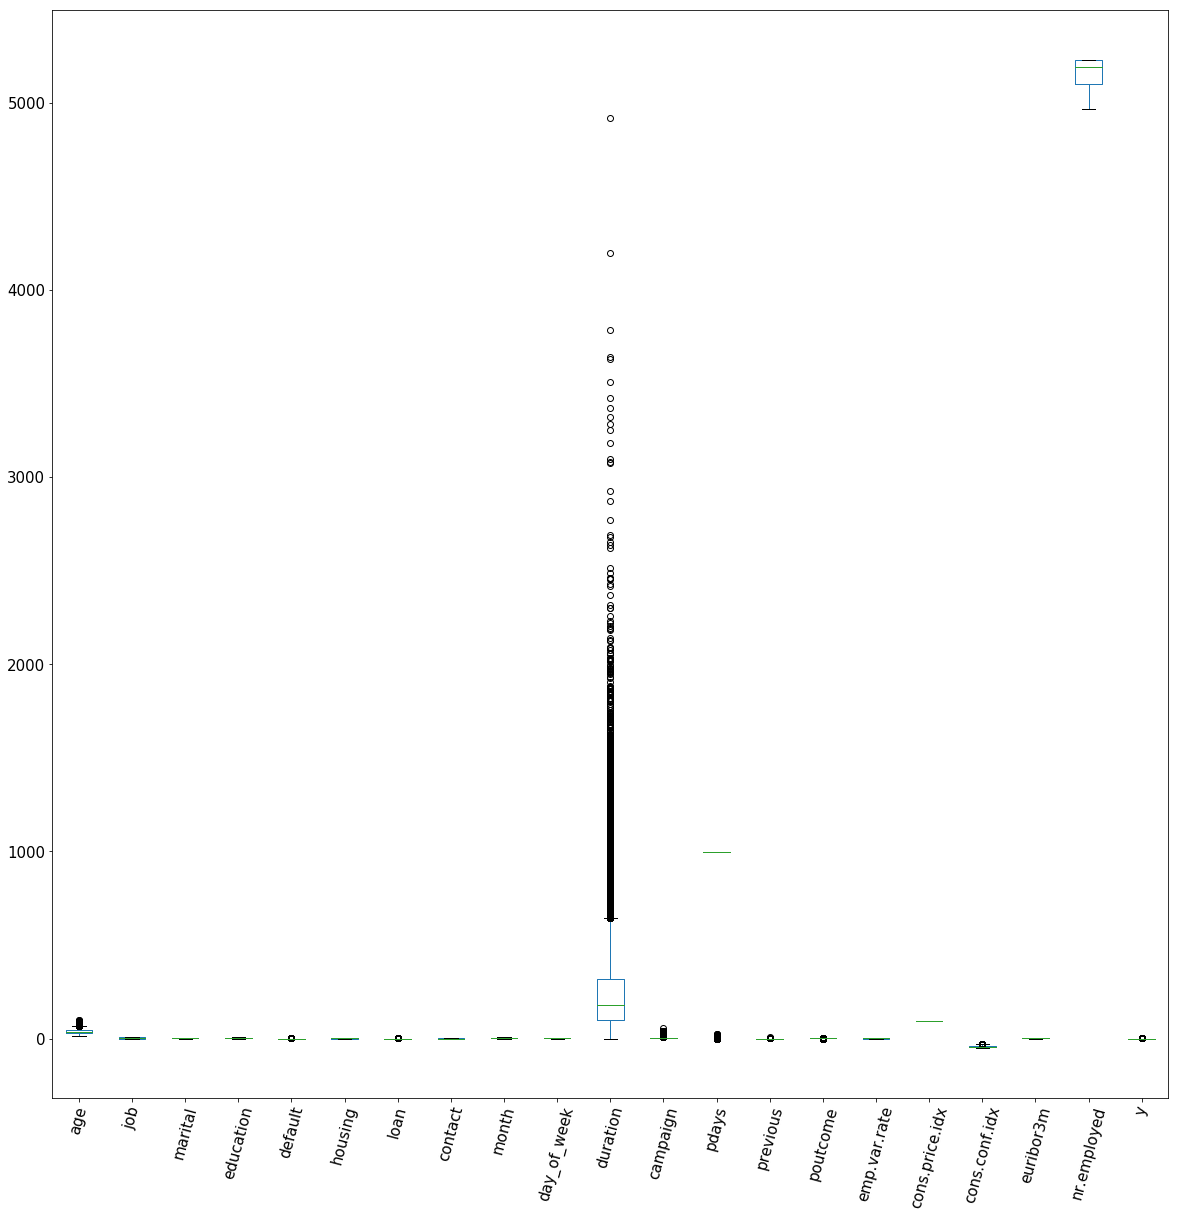

In [55]:
df.boxplot(grid=False, rot=75, fontsize=15, figsize=(20,20))

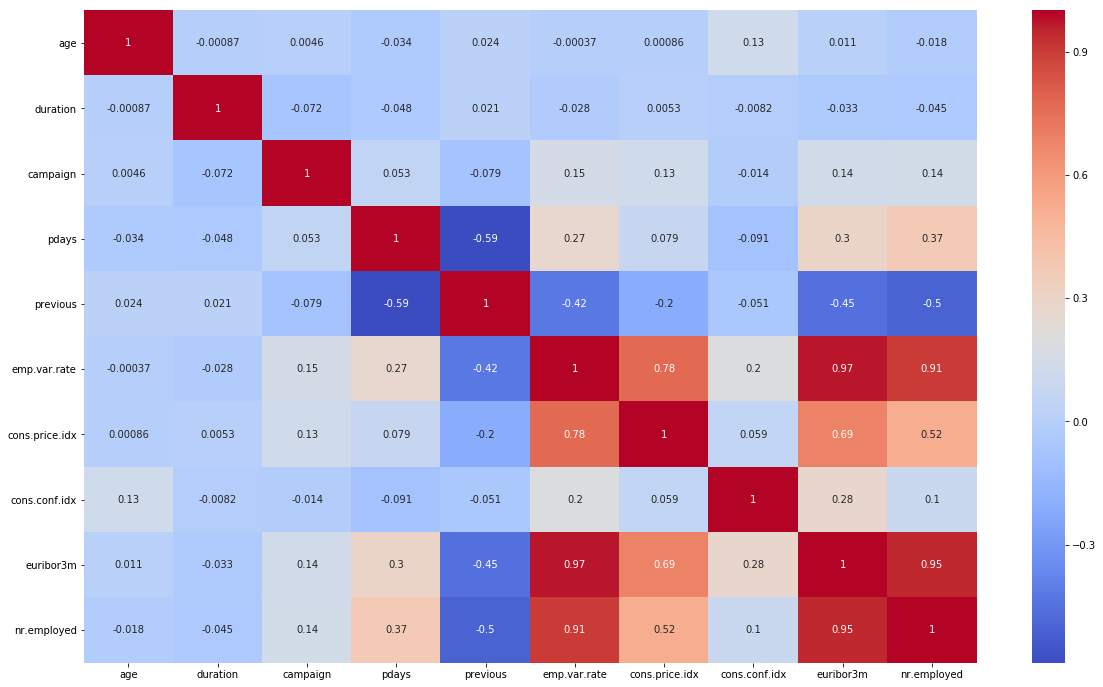

In [11]:
# Multi-Varite Analysis
#calculating correlation among numeric variable 
corr_matrix = df.corr() 

# plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

# Converting Categorical (Object) value to Discrete Number

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['marital'] = LE.fit_transform(df['marital'].astype('str'))

In [22]:
df['marital'].value_counts()

1    24928
2    11568
0     4612
3       80
Name: marital, dtype: int64

In [23]:
df['education'].value_counts()    

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [24]:
df['education'] = LE.fit_transform(df['education'].astype('str'))

In [25]:
df['education'].value_counts()   

6    12168
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: education, dtype: int64

In [34]:
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [40]:
for c in df.columns: 
    if df[c].dtypes == "object":
        df[c] = LE.fit_transform(df[c].astype('str'))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int32
marital           41188 non-null int32
education         41188 non-null int32
default           41188 non-null int32
housing           41188 non-null int32
loan              41188 non-null int32
contact           41188 non-null int32
month             41188 non-null int32
day_of_week       41188 non-null int32
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int32
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int32
dtypes: float64(5), int32(11), int64(5)
memory usage: 4.9 MB


In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Split dataset in features and target variable

In [45]:
X = df.drop('y',axis=1)
y = df.loc[:,'y']

In [46]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Split Train and Test data

In [47]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Building Decision Tree Model based on 'gini' index

In [56]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating Model for gini

In [57]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.8896172210083354)


# ROC Curve for gini

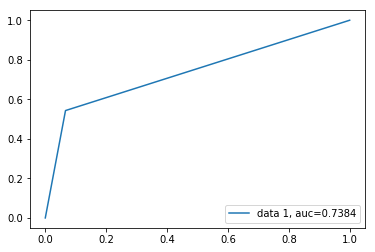

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc={:0.4f}".format(auc))
plt.legend(loc=4)
plt.show()



In [67]:
from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names = target_names))


              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.94     10965
     Class 1       0.51      0.54      0.53      1392

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



# Building Decision Tree Model based on 'entropy'

In [70]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf_etr = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train Decision Tree Classifer
clf_etr = clf_etr.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_etr = clf_etr.predict(X_test)

# Evaluating Model for entropy

In [59]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_etr))

('Accuracy:', 0.8909929594561787)


# ROC Curve for entropy

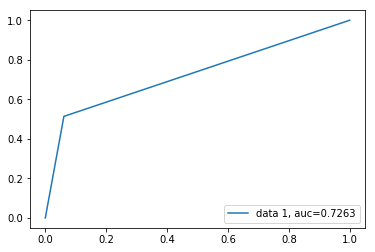

In [73]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_etr)
auc_etr = metrics.roc_auc_score(y_test, y_pred_etr)
plt.plot(fpr,tpr,label="data 1, auc={:0.4f}".format(auc_etr))
plt.legend(loc=4)
plt.show()

In [68]:
from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred_etr, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94     10965
     Class 1       0.52      0.51      0.51      1392

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

